<h1>LAPTOP PRICE PREDICTION</h1>

<h4>Swapnil Suresh Kale</h4>

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor




In [66]:
df=pd.read_csv(r"D:\ds\laptop_data_cleaned.csv")
df


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


<h4>Exploratory Data Analysis</h4>

In [67]:
df.shape

(1273, 13)

In [68]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [70]:
value_count = df['Cpu_brand'].value_counts()
print(value_count)

Cpu_brand
Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64


In [71]:
value_count = df['Gpu_brand'].value_counts()
print(value_count)

Gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64


In [72]:
value_count = df['HDD'].value_counts()
print(value_count)

HDD
0       714
1000    400
500     125
2000     32
32        1
128       1
Name: count, dtype: int64


In [73]:
value_count = df['SSD'].value_counts()
print(value_count)

SSD
256     498
0       436
128     170
512     134
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64


<h4>DATA PRE-PROCESSING</h4>

In [74]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [75]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [76]:
duplicates = df.duplicated().sum()
duplicates

1

In [77]:
df = df.drop_duplicates()
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [78]:
def get_x_y(df):
    FEATURES = [
        "Company",
        "TypeName",
        "Ram",
        "Weight",
        "TouchScreen",
        "Ips",
        "Ppi",
        'Gpu_brand',
        "Cpu_brand",
        "HDD",
        "SSD",
        "Os"
    ]
    TARGET = "Price"

    x = df[FEATURES]
    y = df[TARGET]
    
    return x, y

        # This function is used to extract the feature variable and the target variable

    


In [79]:

x, y = get_x_y(df)
        #  use to call the call the get_x_y() function and assign its return values
        #  to the variables x and y.

In [80]:
categorical_columns = ['Company', 'TypeName', 'Cpu_brand', 'Os', 'Gpu_brand', 'Ram']

x = pd.get_dummies(x, columns=categorical_columns, dtype=int)

# it is used for the one hot encoding in which each categorical column
#  is converted into the binary value and as the datatype given
# it is get converted into it
# pd.get_dummies is used for the one hot encoding

In [81]:
x

,Weight,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_brand_Nvidia,Ram_2,Ram_4,Ram_6,Ram_8,Ram_12,Ram_16,Ram_24,Ram_32,Ram_64
0,1.37,0,1,226.983005,0,128,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.34,0,0,127.677940,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.86,0,0,141.211998,0,256,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.83,0,1,220.534624,0,512,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.37,0,1,226.983005,0,256,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2.20,0,0,100.454670,500,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1269,1.80,1,1,157.350512,0,128,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1270,1.30,1,1,276.053530,0,512,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1271,1.50,0,0,111.935204,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


<h4>Data Visualization</h4>

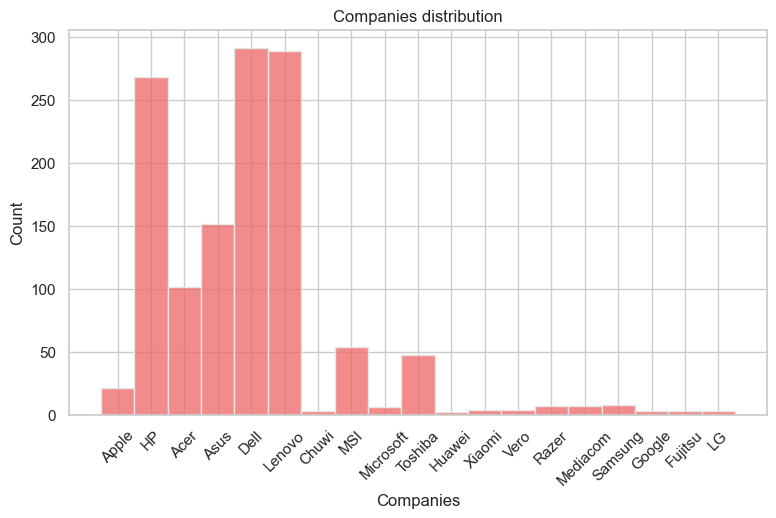

In [82]:
        # FREQUENCY OF OCCURENCE OF EACH COMPANY AS SHOWN THROUGH THE HISTOGRAM

import seaborn as sns
selected_columns = ['Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']
num_columns = x[selected_columns]

Companies = df.loc[:, "Company"]

sns.set(style="whitegrid")

plt.figure(figsize=(9, 5))
sns.histplot(Companies, bins=45, kde=False, color='#EE6666', edgecolor='#E6E6E6')

plt.title("Companies distribution")
plt.xlabel("Companies")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.show()

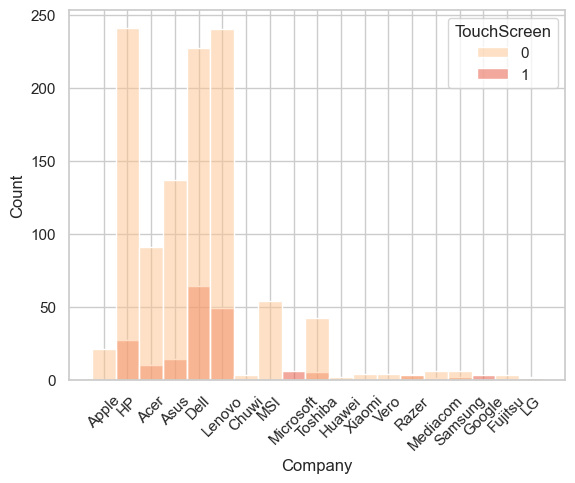

In [83]:
        # CHECKING THE FREQUECY AS THE TOUCH SCREEN
sns.histplot(data=df, x="Company", hue="TouchScreen", palette="OrRd")  
plt.xticks(rotation=45)
plt.show()

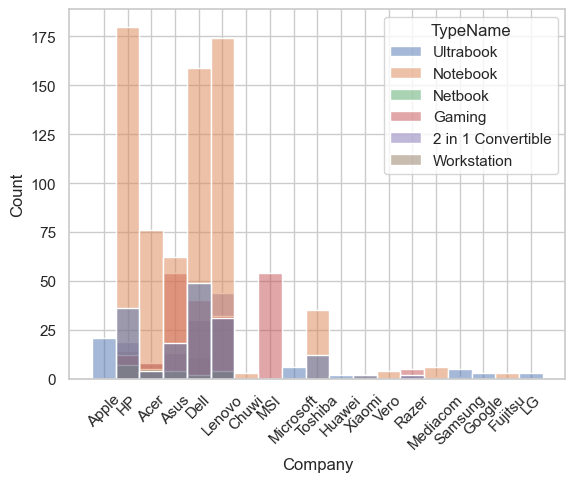

In [84]:
    #   SEEING THE DIFFRENT TYPE OF LAPTOPS PRESENT OF DIFFRENT Companies
sns.histplot(data=df, x="Company", hue="TypeName")
plt.xticks(rotation=45)
plt.show()

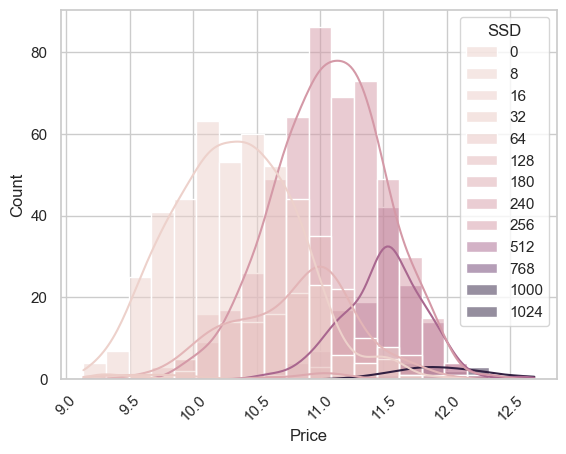

In [85]:
    # RELATION BETWEEN THE PRICE AND THE SSD
sns.histplot(data=df, x='Price', hue='SSD', bins=20, kde=True)
plt.xticks(rotation=45)
plt.show()

 <h4>Model Fitting</h4>

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# splitting the training and testing data

In [87]:
print(f"x_train shape : {x_train.shape}\nx_train shape : {y_train.shape}\nx_train shape : {x_test.shape}\nx_train shape : {y_test.shape}")

# printing the shape of the training and testing data

x_train shape : (1017, 51)
x_train shape : (1017,)
x_train shape : (255, 51)
x_train shape : (255,)


<h4>linear Regression</h4>

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_test_predicted = lin_reg.predict(x_test)

# fitting values in the LinearRegression model

In [89]:
r2 = r2_score(y_test, y_test_predicted)

print(f"R-squared (Accuracy) Score: {r2_score(y_test, y_test_predicted):.2%}")

# checking the accuracy

R-squared (Accuracy) Score: 78.43%


<h4>Polynomial Reggresion</h4>

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)


# Perform polynomial regression of degree 2 on training data, transforming features into polynomial features,
# and calculate R-squared score of the trained model on training data, printing it as a percentage.


print(f'R² score: {r2_score(y_train, lin_reg2.predict(poly_reg.fit_transform(x_train)))*100}')

R² score: 93.71608649976936


<h4>Decision Tree</h4>

In [91]:
RTD = DecisionTreeRegressor(random_state=0)
RTD.fit(x_train,y_train)

print(f'R² score  on training set: {r2_score(y_train, RTD.predict(x_train))*100}')

# Initialize Decision Tree Regressor model with random state 0, fit it to training data,
# and print R-squared score on training set as a percentage.


R² score  on training set: 99.58272817868304


In [92]:
y_test_pred = RTD.predict(x_test)

r2_test = r2_score(y_test, y_test_pred)
print(f'R² score on test set: {r2_test * 100:.2f}%')

# Initialize Decision Tree Regressor and fit it to the training data.
# Predict target variable for the test data and calculate R-squared score on the test set, printing it as a percentage.


R² score on test set: 76.83%


<h4>Random Forest</h4>

In [93]:
RF=RandomForestRegressor(n_estimators = 10,random_state=0)
RF.fit(x_train,y_train.ravel())

print(f'R² score: {r2_score(y_train, RF.predict(x_train))*100}')

# Initialize Random Forest Regressor with 10 estimators and fit it to the training data.
# Calculate R-squared score of the trained model on the training data, printing it as a percentage.


R² score: 97.4433553352263
